### This Notebook Showcases all of the Visualizations for our Dashboard

In [14]:
from reddit_scraper import RedditScraper
from dash import dcc
import plotly.express as px
import matplotlib.pyplot as plt
from models import Model
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
scraper = RedditScraper()

In [3]:
df = scraper.scrape_subreddit_submissions("UIUC")
df.head()

,id,created_utc,title,text,author,score,upvote_ratio,num_comments,url,date
0,lypvic,2021-03-06 00:28:58,Reminder - the spam filter is a little too agg...,If you make a new post and don't see it appear...,Shifted-Paradigm,264,0.99,1,https://www.reddit.com/r/UIUC/comments/lypvic/...,2021-03-06
1,1859gzi,2023-11-27 18:13:06,"New 'Sublease' Post Flair, now required for al...",We have added a new flair for sublease posts t...,love4boats,22,1.00,1,https://www.reddit.com/r/UIUC/comments/1859gzi...,2023-11-27
2,18ac9fk,2023-12-04 04:27:12,what happened to UIUC free food twitter?,title. hungry.,almaosera,30,0.86,13,https://www.reddit.com/r/UIUC/comments/18ac9fk...,2023-12-04
3,18aet95,2023-12-04 07:06:39,"I’ve lost motivation, what should I do?","Most company finish hiring interns, and this i...",ImaginationLeast8215,16,1.00,4,https://www.reddit.com/r/UIUC/comments/18aet95...,2023-12-04
4,18a359k,2023-12-03 20:58:50,how to unfuck my sleep?,at the start of the semester my sleep schedule...,asetofaces,97,0.94,50,https://www.reddit.com/r/UIUC/comments/18a359k...,2023-12-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            300 non-null    object        
 1   created_utc   300 non-null    datetime64[ns]
 2   title         300 non-null    object        
 3   text          300 non-null    object        
 4   author        300 non-null    object        
 5   score         300 non-null    int64         
 6   upvote_ratio  300 non-null    float64       
 7   num_comments  300 non-null    int64         
 8   url           300 non-null    object        
 9   date          300 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 23.6+ KB


### Applying Vader Results

In [22]:
model = Model()
model.select_model('VADER')
df_polarity = model.get_polarity_scores(df)
df_polarity.head()

,neg,neu,pos,compound,id,sentiment,created_utc,title,text,author,score,upvote_ratio,num_comments,url,date
0,0.059,0.881,0.060,0.2617,lypvic,Positive,2021-03-06 00:28:58,Reminder - the spam filter is a little too agg...,If you make a new post and don't see it appear...,Shifted-Paradigm,265,0.99,1,https://www.reddit.com/r/UIUC/comments/lypvic/...,2021-03-06
1,0.037,0.928,0.035,-0.0258,1859gzi,Neutral,2023-11-27 18:13:06,"New 'Sublease' Post Flair, now required for al...",We have added a new flair for sublease posts t...,love4boats,21,0.97,1,https://www.reddit.com/r/UIUC/comments/1859gzi...,2023-11-27
2,0.000,1.000,0.000,0.0000,18ac9fk,Neutral,2023-12-04 04:27:12,what happened to UIUC free food twitter?,title. hungry.,almaosera,28,0.85,12,https://www.reddit.com/r/UIUC/comments/18ac9fk...,2023-12-04
3,0.052,0.894,0.054,-0.2152,18a359k,Negative,2023-12-03 20:58:50,how to unfuck my sleep?,at the start of the semester my sleep schedule...,asetofaces,93,0.95,50,https://www.reddit.com/r/UIUC/comments/18a359k...,2023-12-03
4,0.091,0.852,0.057,-0.8103,18aet95,Negative,2023-12-04 07:06:39,"I’ve lost motivation, what should I do?","Most company finish hiring interns, and this i...",ImaginationLeast8215,15,1.00,4,https://www.reddit.com/r/UIUC/comments/18aet95...,2023-12-04


### Visualization 1 - Word Cloud (We Can Do This for Each Sentiment)

In [6]:
from wordcloud import WordCloud
from PIL import Image


from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

def generate_wordcloud(df_):
    vocab = df_.dropna()['text'].str.replace(r'\?|\.|\'', ' ')
    vocab = ' '.join(vocab)
    vocab = ' '.join([i for i in vocab.split(' ') if i not in stopwords.words('english')])
    wc = WordCloud().generate(vocab)
    plt.imshow(wc)
    return vocab, wc

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\timo7\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### One for Positive Sentiment

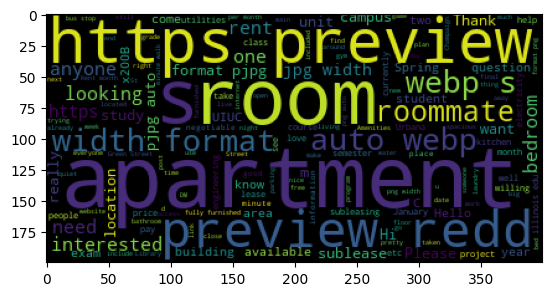

In [23]:
vocab, wordcloud = generate_wordcloud(df_polarity[df_polarity['sentiment'] == 'Positive'])

### One for Negative Sentiment

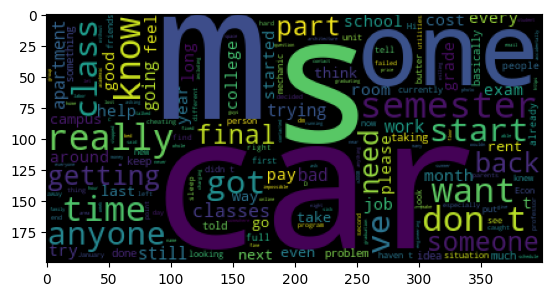

In [24]:
vocab, wordcloud = generate_wordcloud(df_polarity[df_polarity['sentiment'] == 'Negative'])

### Visualization 2, Sentiment Counts Over Time (will be a line graph or Stacked bar chart depending on how sparse the data is)

- Group by Week, Plot Sentiment

In [14]:
df_polarity["week"] = df["created_utc"].dt.to_period("W").dt.to_timestamp()
df_polarity['week']

0     2021-03-01
1     2023-11-27
2     2023-12-04
3     2023-11-27
4     2023-12-04
         ...    
295   2023-11-27
296   2023-11-27
297   2023-11-20
298   2023-11-20
299   2023-11-20
Name: week, Length: 300, dtype: datetime64[ns]

In [15]:
df_polarity['date'] = pd.to_datetime(df_polarity['created_utc']).dt.date

<Axes: xlabel='date'>

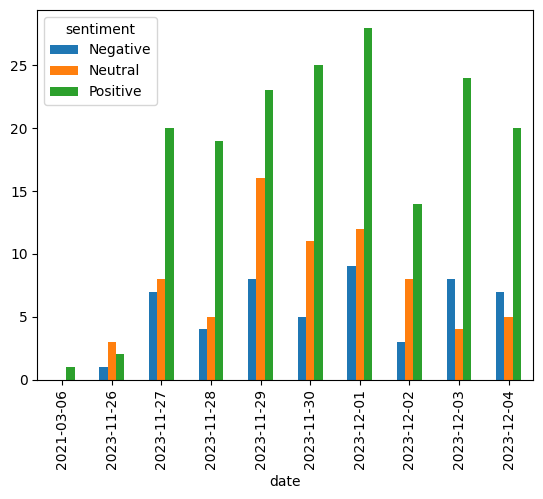

In [16]:
df_polarity.groupby('date')['sentiment'].value_counts().unstack().fillna(0).plot(kind='bar')

### Visualization 3, Pie Chart

<Axes: ylabel='count'>

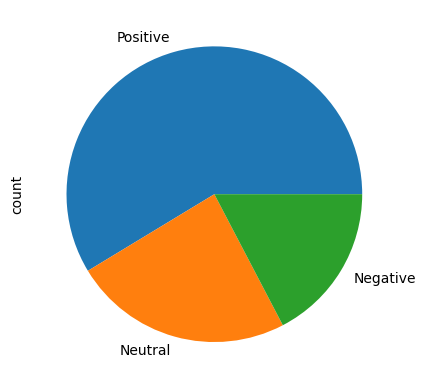

In [17]:
(df_polarity['sentiment'].value_counts() / len(df)).plot(kind='pie')

### Visualization 4 - Sentiment Label vs Scores and Ratio

In [27]:
df_polarity[['sentiment', 'upvote_ratio', 'score']]

,sentiment,upvote_ratio,score
0,Positive,0.99,265
1,Neutral,0.97,21
2,Neutral,0.85,28
3,Negative,0.95,93
4,Negative,1.00,15
...,...,...,...
295,Positive,0.95,16
296,Positive,0.50,0
297,Neutral,0.95,121
298,Positive,0.94,110


<Axes: xlabel='sentiment', ylabel='score'>

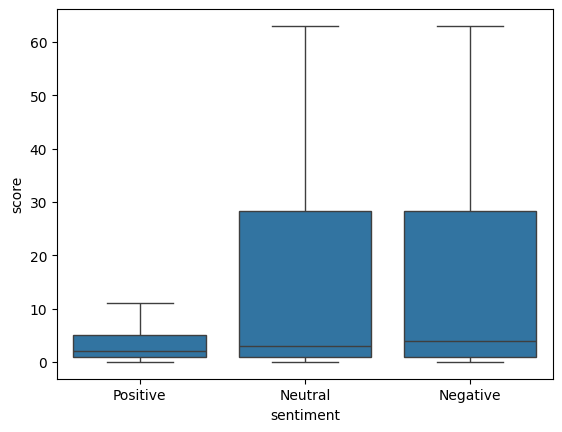

In [30]:
sns.boxplot(df_polarity, x='sentiment', y='score', showfliers=False)

<Axes: xlabel='sentiment', ylabel='upvote_ratio'>

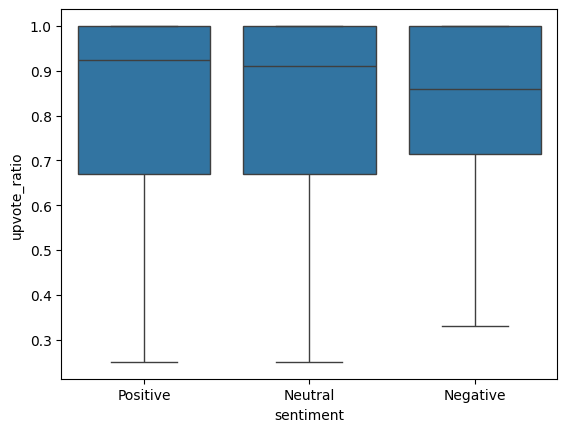

In [31]:
sns.boxplot(df_polarity, x='sentiment', y='upvote_ratio', showfliers=False)

### Visualization 5 - Most Common Words for Each Sentiment

In [36]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = stopwords.words('english')
import re
from nltk.probability import FreqDist
import string

def preprocess_text(df_):
    df_['text'] = df_['text'].apply(lambda x: x.replace(string.punctuation, ''))
    df_['text'] = df_['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
    df_['text'] = df_['text'].apply(lambda x: re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', x))
    df_['text'] = df_['text'].apply(lambda x: re.sub("(@[A-Za-z0-9_]+)","", x))
    df_['tokens'] = df_['text'].apply(lambda x: word_tokenize(x))

df_copy = df.copy()
preprocess_text(df_copy)
df_copy['text'].iloc[:10]

0    If make new post see appear /new couple minute...
1    We added new flair sublease posts titled 'Subl...
2                                       title. hungry.
3    Most company finish hiring interns, third year...
4    start semester sleep schedule really good (11p...
5                                                     
6    Hey! My husband I looking places move closer f...
7    First year international student here, I want ...
8    Hi, I subleasing studio Yugo Urbana Illinois. ...
9    In recently sent-out post, I trying reach fell...
Name: text, dtype: object

In [34]:
df['text'].head(10)

0    If you make a new post and don't see it appear...
1    We have added a new flair for sublease posts t...
2                                       title. hungry.
3    Most company finish hiring interns, and this i...
4    at the start of the semester my sleep schedule...
5                                                     
6    Hey! My husband and I are looking at places to...
7    First year international student here, I want ...
8    Hi, I am subleasing my studio at Yugo Urbana I...
9     In my recently sent-out post, I was trying to...
Name: text, dtype: object

In [37]:
fdist = FreqDist(np.concatenate(df_copy['tokens']))
fdist


FreqDist({'.': 818, ',': 733, 'I': 664, '’': 209, '(': 194, '!': 180, ')': 177, '?': 155, ':': 138, '$': 113, ...})

In [26]:
fdist = FreqDist(np.concatenate(df_copy['tokens']))
fdist

FreqDist({'.': 820, ',': 735, 'I': 664, 'to': 588, 'the': 531, 'and': 521, 'a': 448, 'for': 294, 'is': 259, ':': 256, ...})

In [22]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

<Axes: xlabel='date', ylabel='compound'>

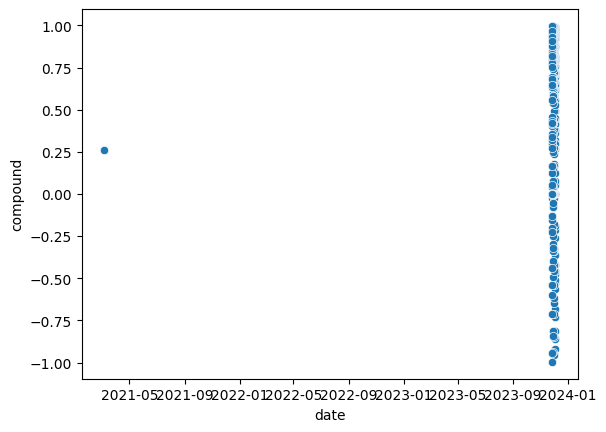

In [47]:
sns.scatterplot(df_polarity, x = 'date', y='compound')